## Job monitoring
- You know but let us write again

In [1]:
from qiskit import *
from qiskit import IBMQ
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor

In [3]:
# firsrt get a backend 
# from a provider 
provider = IBMQ.get_provider('ibm-q-education')
lagos = provider.get_backend('ibm_lagos')

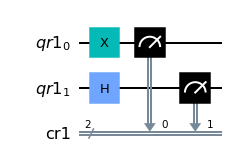

In [18]:
cr = ClassicalRegister(2,name = 'cr1')
qr = QuantumRegister(2,name = 'qr1')
Q = QuantumCircuit(qr,cr)
Q.x(qr[0])
Q.h(qr[1])
Q.measure(qr,cr[:])
Q.draw(output='mpl')

In [19]:
print(Q.depth())

2


In [9]:
from qiskit.tools.jupyter import *
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [11]:
job = execute(Q,backend=lagos,shots=1024,name = 'My_lagos_job')
job_monitor(job)
count = job.result().get_counts()
print(count) # because Q0 was always in 1 state so yes that is why this is like this.

E:\ANACONDA\lib\site-packages\qiskit\execute_function.py:343: UserWarning: name is not a recognized runtime option and may be ignored by the backend.
  job = backend.run(experiments, **run_kwargs)


Job Status: job has successfully run
{'00': 66, '01': 445, '10': 68, '11': 445}


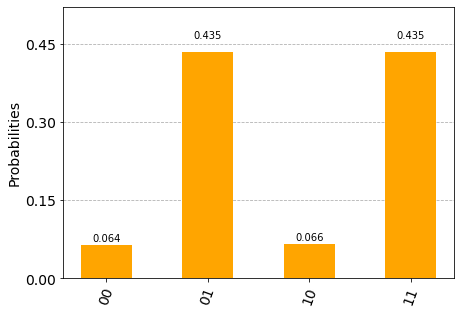

In [12]:
from qiskit.tools.visualization import plot_histogram 
plot_histogram(count, color = 'orange')

In [10]:
#another tool

In [11]:
import qiskit.tools.jupyter 
%qiskit_job_watcher # this is nicer than job monitor! :D

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

### Jupyter tools

In [ ]:
# getting the total backend overview
from qiskit.tools.jupyter import * 
%qiskit_backend_overview

- Getting the information regarding a single backend

In [22]:
casb = provider.get_backend('ibmq_casablanca')
casb 

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='indraprasta-ins-1', project='intro-quantum-co')>

In [31]:
casb.configuration().coupling_map 

[[0, 1],
 [1, 0],
 [1, 2],
 [1, 3],
 [2, 1],
 [3, 1],
 [3, 5],
 [4, 5],
 [5, 3],
 [5, 4],
 [5, 6],
 [6, 5]]

- Getting the qiskit version table : it  contains the version information of all the qiskit modules that you are currently using

In [23]:
%qiskit_version_table 

E:\ANACONDA\lib\site-packages\qiskit\aqua\operators\operator_globals.py:46: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))


In [24]:
# another small thing is the qiskit copyright 
%qiskit_copyright 

### Yes , it is validated.

## How to change the version of qiskit

- Basically create a new environment with the downgraded version of the qiskit you want to use 
- Example :
    - #create new environment in conda
    - conda create --name qiskit-for-abe --clone (your qiskit envirnoment)
    - # then deactivate the current environment 
    - # activate the new environment and downgrade your version of qiskit
    - pip install -U qiskit==(verion you want)
- That is it, activate a jupyter notebook bas.